# **Big Mart Sales prediction**

# **Problem statement**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

**Variable Description :**

--**Item_Identifier**- Unique product ID

--**Item_Weight**- Weight of product

--**Item_Fat_Content** - Whether the product is low fat or not

--**Item_Visibility**- The % of total display area of all products in a store allocated to the particular product

--**Item_Type** - The category to which the product belongs

--**Item_MRP** - Maximum Retail Price (list price) of the product

--**Outlet_Identifier** - Unique store ID

--**Outlet_Establishment_Year**- The year in which store was established

--**Outlet_Size:** The size of the store in terms of ground area covered

--**Outlet_Location_Type-** The type of city in which the store is located

--**Outlet_Type** -Whether the outlet is just a grocery store or some sort of supermarket

--**Item_Outlet_Sales**- Sales of the product in the particulat store. This is the outcome variable to be predicted.

# Hypotheses generation

# **Store Level Hypotheses:**

**City type:** Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.

**Population Density:** Stores located in densely populated areas should have higher sales because of more demand.
Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.


**Competitors:** Stores having similar establishments nearby should have less sales because of more competition.

**Marketing:** Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.

**Location:** Stores located within popular marketplaces should have higher sales because of better access to customers.

**Customer Behavior:** Stores keeping the right set of products to meet the local needs of customers will have higher sales. 
**Ambiance:** Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.
# **Product Level Hypotheses:**

**Brand:** Branded products should have higher sales because of higher trust in the customer.

**Packaging:** Products with good packaging can attract customers and sell more.
Utility: Daily use products should have a higher tendency to sell as compared to the specific use products.

**Display Area:** Products which are given bigger shelves in the store are likely to catch attention first and sell more.

**Visibility in Store:** The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

**Advertising:** Better advertising of products in the store will should higher sales in most cases.

**Promotional Offers:** Products accompanied with attractive offers and discounts will sell more.

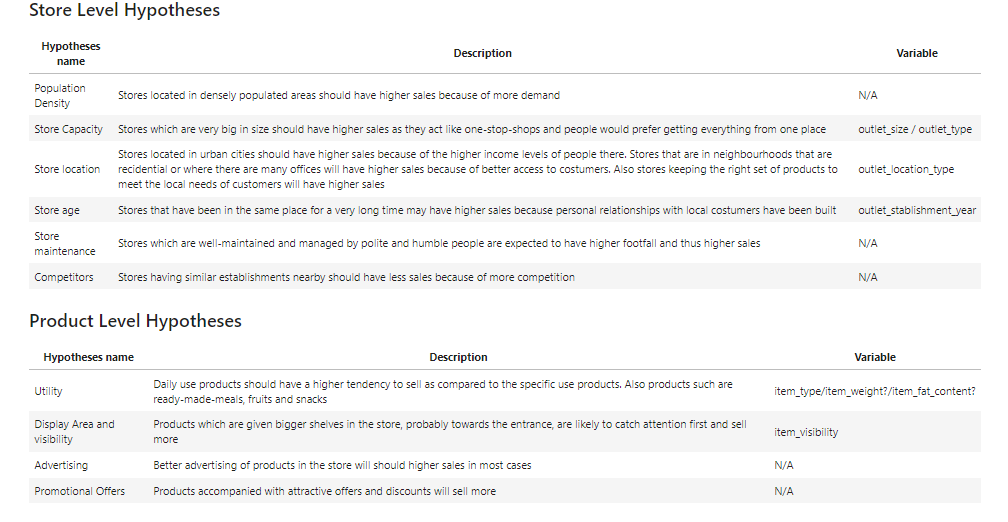

# Understanding the Data

Importing the Dependencies

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Data Collection & Analysis

In [119]:
# Loading the data set from csv file to a Pandas DataFrame
data = pd.read_csv('/content/big_mart_data.csv')

In [120]:
#First 5 rows of the DataFrame
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [122]:
# Number of Datapoints(Rows) and number of Features(Columns)
data.shape

(8523, 12)

In [123]:
#Finding missing value in each columns
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Observations:

The missing values of the Item_Outlet_Sales come from the dataset.


The missing values of **Item_Weight** and **Outlet_Size** need to be imputed.

In [124]:
#Descriptive analysis of the Numerical features of the Dataset
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Observations:**

The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.

In [125]:
# Finding out the no. of unique value in each column in the Dataset
data.apply(lambda x: len(x.unique()))


Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

-The code "data.apply(lambda x: len(x.unique()))" is used to count the number of unique values in each column of a pandas DataFrame called "data".

-The "apply" function is used to apply a function to each column of the DataFrame. In this case, the function being applied is a lambda function that takes each column ("x") and applies the "unique" function to it, which returns an array of unique values in the column.

-The "len" function is then used to count the number of unique values in each column. This gives us the total number of unique values in each column of the DataFrame.

The resulting output is a pandas Series that shows the number of unique values in each column of the DataFrame. This information can be useful in identifying which columns have a large number of unique values and deciding how to handle those columns in the data analysis and modeling process. For example, columns with a large number of unique values may be candidates for feature engineering or feature selection to reduce dimensionality and improve model performance.

Observations:

There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups

There are 10 stores.

Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.

There are only 16 Item_Type.

In [126]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for variable Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for varia

The code above is used to print the frequency of categories in each categorical variable in a pandas DataFrame called "data".

The code uses a for loop to iterate over each column in the list of categorical columns (presumably defined earlier in the code).

For each column, the code prints a header indicating the variable name and then uses the "value_counts()" method to calculate the frequency of each category in the column. The resulting output is a count of the number of occurrences of each unique category in the column, sorted from most frequent to least frequent.

This information can be useful in understanding the distribution of categorical variables and identifying any imbalances or anomalies in the data. For example, if one category dominates a particular variable, it may need to be handled specially in the data analysis or modeling process to avoid biasing the results. Additionally, rare categories may need to be combined or eliminated to simplify the data and improve model performance.

# **Observations:**

-Low Fat, low fat and LF are all Low Fat;reg and Regular are both Regular.

-Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

-Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

**Observations on Missing Values**

-The missing values of the Item_Outlet_Sales come from the dataset.

-The missing values of Item_Weight and Outlet_Size need to be imputed

-The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

-Low Fat, low fat and LF are all Low Fat; reg and Regular are both Regular.

**Observations on Data Analysis to be done**

-There are 10 stores.

-Since the Item_MRP is bigger than the number of products, this could mean that in different stores, the MRP could be different.

-There are only 16 Item_Type.

-Stores with Outlet_Identifier OUT010 and OUT019 have significantly smaller number of sales.

**Observations on Feature engineering to be done**

-It might be more helpful to convert the Outlet_Establishment_Years into how old the establishments are.

-There are 1559 products - This is too many to be useful, we need to see how we can categorise them into a smaller number of groups

-Maybe combine some of the categories in Outlet_Type -> check the mean sales by type of outlet.

## Impute missing **values**

Mean--> Average value (Numerical column)

Mode --> Most repeated value(Categorical)

**Item_Weight**

Assuming each Item_Identifier identifies a specific item, then it seems reasonable to impute the missing values of the Item_Weight by the mean Item_Weight of each Item_Identifier.

In [127]:
# mean value of "Item_Weight" column

data['Item_Weight'].mean()

12.857645184135976

In [128]:
# Filling the missing values in Item_Weight column with mean value
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [129]:
# Checking for any missing value
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Outlet_Size**

It could be reasonable to impute the missing values of Outlet_size by the mode size for each Outlet_Type.

Let's have a look at the mode size for each Outlet_Type.

In [130]:
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

This code creates a pivot table called mode_of_outlet_size using the Pandas library in Python. The pivot table is created from a DataFrame called data.

The pivot table has two main parameters, values and columns.

The values parameter specifies which column of the DataFrame we want to use as the values in the pivot table. In this case, we are using the 'Outlet_Size' column.

The columns parameter specifies which column of the DataFrame we want to use as the columns in the pivot table. In this case, we are using the 'Outlet_Type' column.

The aggfunc parameter is a function that is applied to the values in each group of the pivot table. In this case, the function is a lambda function that calculates the mode (most frequently occurring value) of the group and returns it as the result. The [0] at the end of the lambda function is used to select the first mode value, in case there are multiple values with the same frequency.

Overall, this code creates a pivot table that shows the mode of the 'Outlet_Size' column for each group of the 'Outlet_Type' column. It can be useful for analyzing and summarizing data in a convenient way.

In [131]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


Text(0.5, 1.0, '')

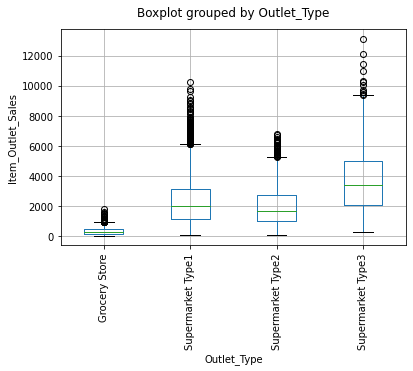

In [132]:
# sales per Outlet_Type
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

This code is creating a boxplot of the "Item_Outlet_Sales" column in the "data" DataFrame, grouped by the "Outlet_Type" column. The "rot=90" argument rotates the x-axis labels by 90 degrees for better readability.

The resulting plot will show the distribution of "Item_Outlet_Sales" values for each "Outlet_Type" group. The y-axis label is set to "Item_Outlet_Sales", and the plot title is left blank, so you can add a title by specifying the title in the "set_title()" method.

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

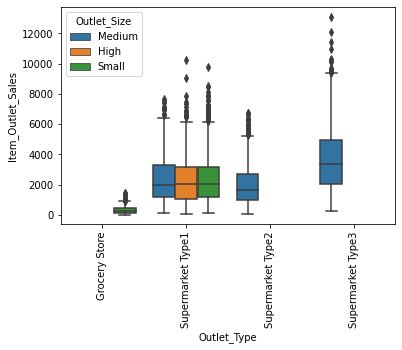

In [133]:
import seaborn as sns
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#ax = data.boxplot(column='Item_Outlet_Sales', by=['Outlet_Type', 'Outlet_Size'], rot=90)
#ax.set_ylabel('Item_Outlet_Sales')
#ax.set_title('')

Grocery stores report far fewer sales than the other Outlet_Types and they have Outlet_Size values that are either 'small' or 'unknown'. Therefore we can reasonably replace the mode value of Grocery Stores with 'small' and impute the missing values of Outlet_Size with the mode value for each Outlet_Type. To check we have done this correctly, we can visualise the Item_Outlet_Sales per Outlet_Identifier.

Note also that Type 2 stores are all medium and Type 3 are also all medium size. Type 1 stores have all sizes, which all have similar sales.


Text(0.5, 1.0, '')

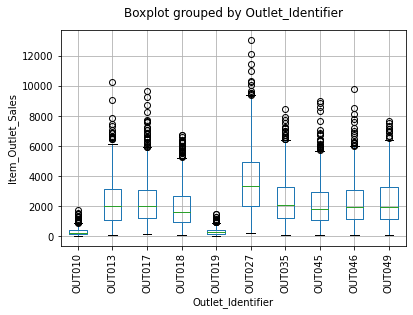

In [134]:
# sales per Outlet_Identifier
ax = data.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

OUT010 and OUT019 seem to be of size 'small'.

In [135]:
# print Outlet_Type of OUT010 and Out019
from scipy.stats import mode
outlet_identifier_mode_size = data.pivot_table(values='Outlet_Size', index='Outlet_Identifier', aggfunc=(lambda x: mode(x).mode[0]))
outlet_identifier_mode_size

,Outlet_Size
Outlet_Identifier,
OUT013,High
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT046,Small
OUT049,Medium


In this code, the "aggfunc" argument of the "pivot_table()" function is set to a lambda function that takes a sequence of values "x" as input and returns the mode of "x" using the "mode()" function from the "scipy.stats" module.

The "mode()" function returns an object containing the mode(s) of the input sequence, along with the count of the mode(s). To extract the actual mode value, we access the "mode" attribute of the object and retrieve its first element using the "mode[0]" syntax. This is necessary because the "mode()" function can return multiple modes if there is a tie.

By setting the "aggfunc" argument to this lambda function, the "pivot_table()" function will apply this function to each group of values in the "Outlet_Size" column that corresponds to each unique value in the "Outlet_Identifier" column, and return the mode of each group as the final value in the pivot table.

In [136]:
missing_values = data['Outlet_Size'].isnull().sum()

In [137]:
print(missing_values)

2410


In [138]:
missing_values = data['Outlet_Size'].isnull()

In [139]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [140]:
data.loc[missing_values, 'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

data: This refers to a pandas DataFrame.

missing_values: This is a boolean mask that selects rows in the DataFrame where the 'Outlet_Size' column has missing values (i.e., NaN).

'Outlet_Size': This is the name of a column in the DataFrame that we want to modify.

data.loc[missing_values,'Outlet_Type']: This selects the 'Outlet_Type' column for the rows where 'Outlet_Size' is missing.

.apply(lambda x: mode_of_outlet_size[x]): This applies a lambda function to each value in the 'Outlet_Type' column that we just selected. The lambda function looks up the value of x (i.e., the current value in the 'Outlet_Type' column) in a dictionary called mode_of_outlet_size and returns the corresponding mode of the 'Outlet_Size' column for that value of 'Outlet_Type'.

In [141]:
# Checking for any missing value
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Min value of Item_Visibility

The min value of Item_Visibility is 0, but this can not be as every item must have some visibility.

We want to replace the 0 values for the mean visibility value of that product in each store.

In [142]:
# check how many entries have 0
data['Item_Visibility'].value_counts().head()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
Name: Item_Visibility, dtype: int64

526 out of 8523 is a lot so we replace the 0 values for NAN values so the mean value is not affected.



In [143]:
# visual check that the 0 values in the first 10 entries have been replaced
data['Item_Visibility'] = data['Item_Visibility'].replace({0:np.nan})

In this code, the "replace()" method from the pandas library is used to replace all occurrences of 0 in the "Item_Visibility" column of the "data" DataFrame with NaN (Not a Number), which is a special value used to represent missing or undefined values in pandas.

This is often done to handle missing data in a dataset and prevent any potential issues with downstream data analysis, such as skewing the mean or standard deviation of a distribution or causing errors in calculations. In this case, it seems that the value 0 in the "Item_Visibility" column may not be a valid or meaningful value, so it is replaced with NaN to indicate that the value is missing or undefined.

Check the visibility for each Item_Type in each Outlet_Type.

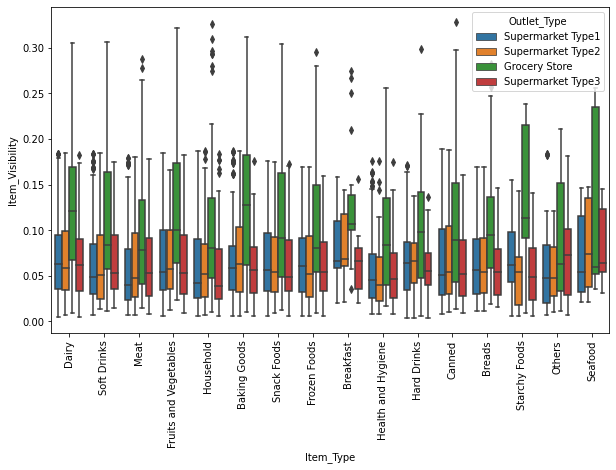

In [144]:
plt.figure(figsize=(10, 6)) # set the figure size to 10 x 6 inches
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show() # show the plot


In [145]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3         NaN
4         NaN
5         NaN
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

The Item_Visibility for each Item_Type seems to be very similar for Type 1, 2 and 3 supermarkets and that is lower than for Grocery Sotres; in other words, buying in Grocery Stores is more expensive than in Supermarkets. So we impute missing values for each Item_Type in each Outlet_Type.

In [146]:
# pivot table with the mean values that will be used to replace the nan values
table = data.pivot_table(values='Item_Visibility', index='Item_Type', columns='Outlet_Type', aggfunc='mean')
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.127519,0.066025,0.069763,0.063000
Breads,0.107172,0.066962,0.065450,0.057083
Breakfast,0.132249,0.080078,0.083165,0.065450
Canned,0.106142,0.067540,0.072232,0.062376
Dairy,0.122944,0.069374,0.070324,0.067568
Frozen Foods,0.107033,0.065310,0.063023,0.063515
Fruits and Vegetables,0.120401,0.067442,0.067224,0.066292
Hard Drinks,0.107030,0.066509,0.065995,0.060225
Health and Hygiene,0.095284,0.053916,0.051457,0.054353


In this code, the "pivot_table()" function from the pandas library is used to create a new DataFrame "table" that summarizes the mean values of the "Item_Visibility" column in the "data" DataFrame. The mean values are calculated for each combination of unique values in the "Item_Type" and "Outlet_Type" columns.

Specifically, the "values" argument is set to 'Item_Visibility', indicating that we want to calculate the mean of the "Item_Visibility" column. The "index" argument is set to 'Item_Type', which means that we want to group the data by the unique values in the "Item_Type" column. The "columns" argument is set to 'Outlet_Type', indicating that we want to create a separate column for each unique value in the "Outlet_Type" column.

The "aggfunc" argument is set to 'mean', which specifies that we want to calculate the mean of each group of values. This means that the resulting "table" DataFrame will have the mean values of "Item_Visibility" for each combination of "Item_Type" and "Outlet_Type".

Finally, the "table" DataFrame is printed to the console using the "print()" function. This DataFrame will have "Item_Type" as the index, "Outlet_Type" as the columns, and the mean values of "Item_Visibility" for each combination of "Item_Type" and "Outlet_Type" as the corresponding values in the table.

In [147]:
# replace the nan values
# define function that returns the mean values
def find_mean(x):
    return table.loc[x['Item_Type'], x['Outlet_Type']]

# replace missing values in loan_amount with median values
data['Item_Visibility'].fillna(data[data['Item_Visibility'].isnull()].apply(find_mean, axis=1), inplace=True)

In this code, missing values (NaN) in the "Item_Visibility" column of the "data" DataFrame are replaced with the mean values calculated in the "table" DataFrame that was created in the previous code snippet.

To achieve this, a function called "find_mean()" is defined that takes a row of data (i.e., a Series) as input and returns the mean value of "Item_Visibility" for the corresponding combination of "Item_Type" and "Outlet_Type" using the "table" DataFrame. This function uses the "loc[]" function to locate the appropriate mean value in the "table" DataFrame based on the "Item_Type" and "Outlet_Type" values in the input row.

Next, the "apply()" function is used with the "find_mean()" function and the "axis=1" argument to apply the function to each row of the "data" DataFrame where "Item_Visibility" is missing. This returns a Series of mean values that correspond to each missing value.

Finally, the "fillna()" method is used to replace the missing values in the "Item_Visibility" column with the corresponding mean values obtained from the previous step. The "inplace=True" argument specifies that the changes should be made to the "data" DataFrame directly, rather than returning a new DataFrame.plt.figure(figsize=(10, 6)) # set the figure size to 10 x 6 inches

<function matplotlib.pyplot.show(close=None, block=None)>

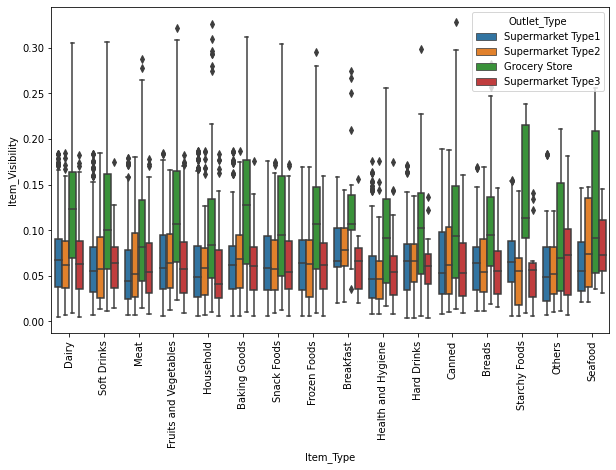

In [148]:
plt.figure(figsize=(10, 6)) # set the figure size to 10 x 6 inches
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Visibility', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show

In [149]:
data['Item_Visibility'].head(10)

0    0.016047
1    0.019278
2    0.016760
3    0.120401
4    0.059544
5    0.069763
6    0.012741
7    0.127470
8    0.016687
9    0.094450
Name: Item_Visibility, dtype: float64

**Combine Low Fat, low fat and LF to Low Fat and reg and Regular to Regular**


In [150]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [151]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 
                                                             'low fat': 'Low Fat', 
                                                             'reg': 'Regular'})
data['Item_Fat_Content'].head(5)

0    Low Fat
1    Regular
2    Low Fat
3    Regular
4    Low Fat
Name: Item_Fat_Content, dtype: object

In [152]:
print('\nFrequency of Categories for variable Item_Fat_Content')
print(data['Item_Fat_Content'].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


# **Feature Engineering**

Convert the Outlet_Establishment_Years into how old the establishments are

In [153]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].head(5)

0    14
1     4
2    14
3    15
4    26
Name: Outlet_Age, dtype: int64

In [154]:
data['Outlet_Age'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Age, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

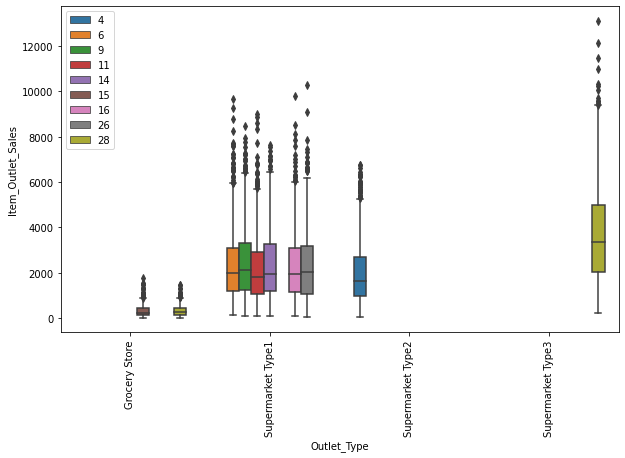

In [155]:
plt.figure(figsize=(10, 6)) # set the figure size to 10 x 6 inches
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='upper left')
plt.show

**Observations:**

Supermarket type 3 is the oldest, having been stablished 28 years ago. Type 1 have been build at different times, Type 2 is the newest. Grocery stores are relaviely old.



This code uses the Seaborn library to create a box plot of the "Item_Outlet_Sales" column in the "data" DataFrame, grouped by "Outlet_Type" and colored by "Outlet_Age". The order of the "Outlet_Type" categories is specified using the "order" argument to ensure that they appear in a specific order on the x-axis.

The resulting plot is assigned to the variable "ax". The "set_xticklabels()" method is used to rotate the x-axis labels by 90 degrees for better readability.

Next, the "legend()" method is called to create a legend for the plot. By default, Seaborn will create a legend for the "hue" variable ("Outlet_Age" in this case). The "legend()" method is used again to adjust the position of the legend to the "upper left" corner of the plot.

Overall, this code is an example of using box plots and color-coding to visualize relationships between multiple variables in a single plot.

## **Create broader category for type of item**


Notice the Item_Identifiers all start with letters. Let's see what they are and what they mean.

In [156]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:3]
data['Item_Type_Category'].unique()

array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In this code, a new column called "Item_Type_Category" is created in the "data" DataFrame. This column is populated by extracting the first three characters of the "Item_Identifier" column as a string using the "astype()" and "str[:3]" methods.

The resulting "Item_Type_Category" values are unique subsets of the "Item_Identifier" values, representing the category of the item rather than the specific identifier.

For example, if the "Item_Identifier" is "FDX07", the corresponding "Item_Type_Category" would be "FDX". This can be useful for grouping and analyzing data by broader categories rather than individual items.

These seem to stand for Food, Drink and Non-Consumable. So rename them to be more intuitive.

In [157]:
data['Item_Type_Category'] = data['Item_Identifier'].astype(str).str[:2]
data['Item_Type_Category'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [158]:
data['Item_Type_Category'] = data['Item_Type_Category'].map({'FD': 'Food', 'DR':'Drink', 'NC':'Non-Consumable'})

In this code, the "Item_Type_Category" column in the "data" DataFrame is modified by using the "map()" method to replace the unique category codes with more descriptive labels.

The mapping is performed by passing a dictionary to the "map()" method. The keys in the dictionary correspond to the original category codes ("FD", "DR", and "NC"), and the values correspond to the new category labels ("Food", "Drink", and "Non-Consumable", respectively).

For example, if the "Item_Type_Category" was previously "FD", it would be replaced with "Food". This step can be useful for improving the readability and interpretability of data analysis results.

The map() method is a pandas function used to transform values in a Series or DataFrame. It applies a function to each element of a Series or DataFrame and returns a new Series or DataFrame with the transformed values. The map() method can be used with a dictionary, a function, or a Series.

When a dictionary is used with map(), it replaces each key in the dictionary with its corresponding value in the Series or DataFrame. For example, if we have a Series s with values [1, 2, 3], and we apply s.map({1: 'one', 2: 'two', 3: 'three'}), the resulting Series would have values ['one', 'two', 'three'].

In [159]:
data['Item_Type_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drink              799
Name: Item_Type_Category, dtype: int64

## **Change value of the 'Item_Fat_Content' of the items that are non-consumables.**
Non-consumables do not have a fat content.

In [160]:
data.loc[data['Item_Type_Category']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In this code, the "data" DataFrame is modified by replacing the "Item_Fat_Content" values for items in the "Non-Consumable" category with a new value of "Non-Edible".

This is done by first using boolean indexing to select the rows in the DataFrame where the "Item_Type_Category" is "Non-Consumable", and then using the .loc[] method to access the "Item_Fat_Content" column in those rows. The new value of "Non-Edible" is assigned to these rows using the assignment operator "=".

After this modification is made, the value_counts() method is used to count the number of occurrences of each unique value in the "Item_Fat_Content" column. This can be useful for verifying that the modification was successful and for understanding the distribution of the "Item_Fat_Content" values in the data.

## **Make a new category for items that reflect their sales - very high, high, medium, low.**
Recall that there are more Item_MRP than Item_Identifier, indicating that different stores have different Item_MRP. We can visualise the Item_MRP grouped by the Item_Type and Outlet_Type

<function matplotlib.pyplot.show(close=None, block=None)>

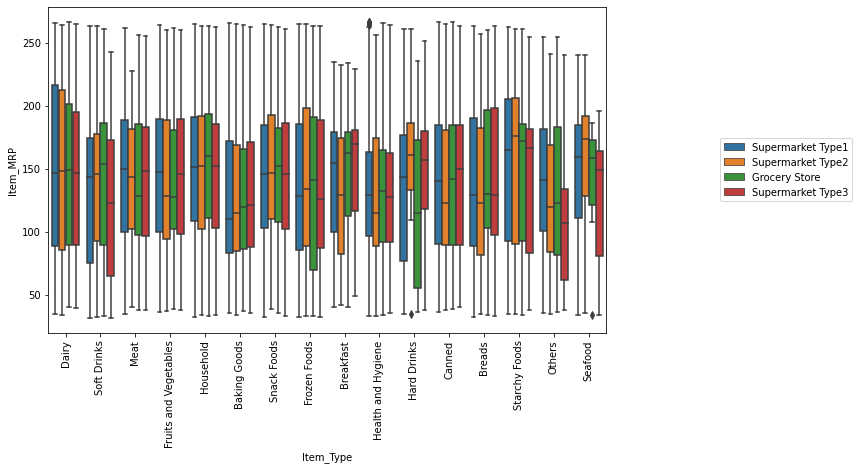

In [161]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))
plt.show

All the Item_Types seems to have a similar average Item_MRP accross the Outlet_Types. So we do not need to consider different Item_MRP per Outlet_Type.

Now we can have a look at the distribution of all Item_MRP.

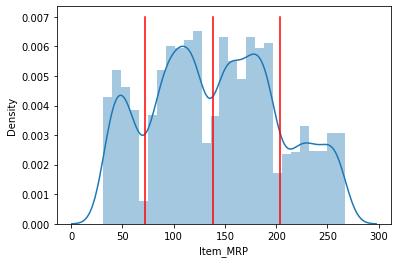

In [162]:
ax = sns.distplot(data['Item_MRP'])
x1=72
x2=138
x3=204
ax.plot([x1, x1],[0, 0.007], color='r')
ax.plot([x2, x2],[0, 0.007],color='r')
ax.plot([x3, x3],[0, 0.007],color='r')
plt.show()

The Item_MRP clearly shows there are 4 different price categories. So we define them to be 'Low', 'Medium', 'High', 'Very High'.

In [163]:
def price_cat(x):
    if x <= x1:
        return 'Low'
    elif (x > x1) & (x <= x2):
        return 'Medium'
    elif (x > x2) & (x <= x3):
        return 'High'
    else:
        return 'Very High'

data['Item_MRP_Category'] = data['Item_MRP']
data['Item_MRP_Category'] = data['Item_MRP_Category'].apply(price_cat)
data['Item_MRP_Category'].value_counts()

High         3002
Medium       2750
Very High    1429
Low          1342
Name: Item_MRP_Category, dtype: int64

In this code, a histogram of the "Item_MRP" column of the "data" DataFrame is created using the distplot() function from the Seaborn library.

Three vertical lines are added to the plot using the plot() function from matplotlib. These lines are positioned at the values x1=72, x2=138, and x3=204 on the x-axis and are red in color.

In this code, a new function price_cat() is defined that takes a single argument x.

This function categorizes values of x into one of four categories based on whether they fall below or above certain thresholds defined by the variables x1, x2, and x3, and returns the corresponding category name as a string.

The data DataFrame is then modified by creating a new column called "Item_MRP_Category" and assigning it the initial values of the "Item_MRP" column.

The apply() method is used to apply the price_cat() function to each value in the "Item_MRP_Category" column and replace the original values with the category names returned by the function.

Finally, the value_counts() method is used to count the number of occurrences of each unique value in the "Item_MRP_Category" column. This can be useful for understanding the distribution of item prices in the data and how they are categorized by the price_cat() function.

Data Analysis

In [164]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070440,140.992782,1997.831867,2181.288914,15.168133
std,4.226124,0.048885,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,9.000000
50%,12.857645,0.060700,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.096335,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


## **Item_MRP**
As we have seen previously, the Item_MRP is clearly divided into 4 categories. Now, let's plot the Item_MRP grouped by the Outlet_Type and Outle_Size.

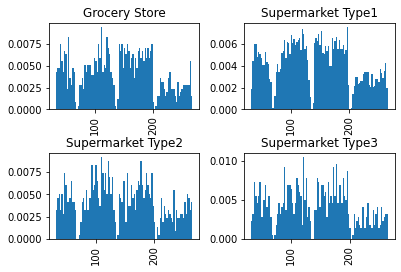

In [165]:
ax = data.hist(column='Item_MRP' , by='Outlet_Type', bins=100, density=True)

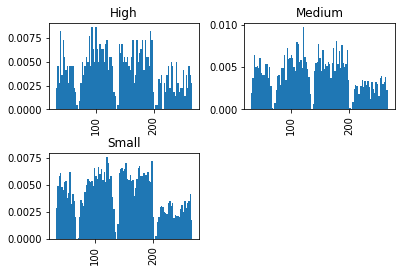

In [166]:
ax = data.hist(column='Item_MRP' , by='Outlet_Size', bins=100, density=True)

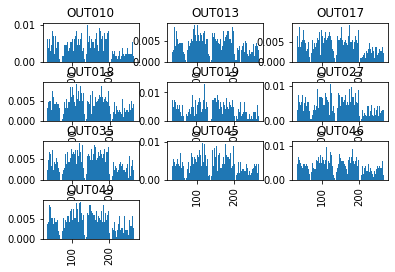

In [167]:

ax = data.hist(column='Item_MRP' , by='Outlet_Identifier', bins=100, density=True)

So the different categories of Item_MRP are well represented accross all outlets.

**Explore how Item_MRP depends on Outlet_Type:**

<function matplotlib.pyplot.show(close=None, block=None)>

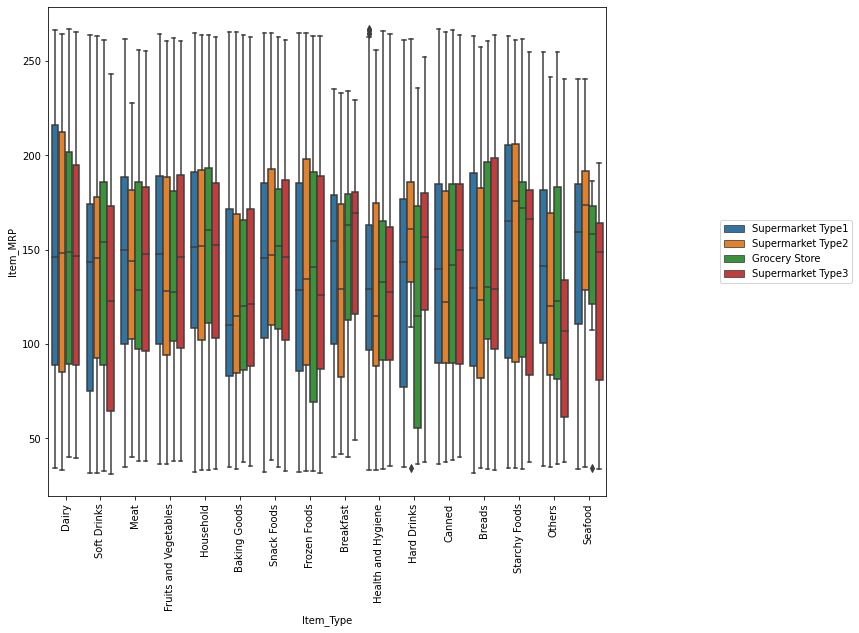

In [168]:
plt.figure(figsize=(10,9))
ax = sns.boxplot(data=data, x='Item_Type', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))
plt.show

This code snippet seems to create a box plot using the seaborn library in Python. The plot shows the distribution of item prices ('Item_MRP') for different types of items ('Item_Type') sold at different types of outlets ('Outlet_Type').

The plt.figure(figsize=(10,9)) line sets the size of the figure to 10 inches wide and 9 inches tall.

The sns.boxplot() function creates the box plot. The data argument specifies the data to be plotted, while the x, y, and hue arguments specify the variables to be plotted on the x-axis, y-axis, and as a grouping variable (represented by different colors), respectively.

The ax.set_xticklabels() method sets the labels for the x-axis ticks and rotates them by 90 degrees to prevent overlapping labels.

The ax.legend() method adds a legend to the plot, and the ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5)) line specifies the location of the legend to be to the right of the plot, and offset from the center by (1.45, 0.5) units.

Finally, the plt.show() function displays the plot.

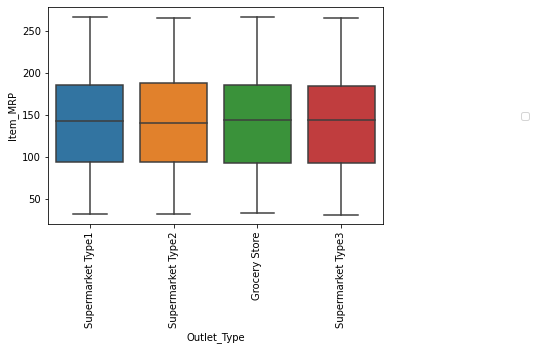

In [169]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_MRP')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_MRP does not differ depending on Outlet_Type.

# Item_Outlet_Sales

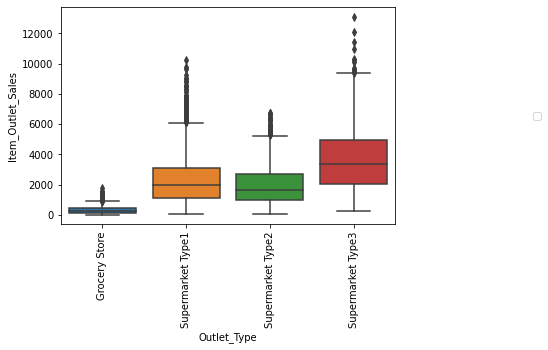

In [170]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

Item_Outlet_Sales are very low for Grocery Stores, even though we saw above the Item_MRP is the same for all Outlet_Types.

This code snippet also creates a box plot using the seaborn library in Python. However, this plot shows the distribution of sales ('Item_Outlet_Sales') for different types of outlets ('Outlet_Type').

The sns.boxplot() function is used again to create the plot. The data argument specifies the data to be plotted, while the x and y arguments specify the variables to be plotted on the x-axis and y-axis, respectively. The order argument specifies the order in which the outlet types should appear on the x-axis.

The ax.set_xticklabels() method sets the labels for the x-axis ticks and rotates them by 90 degrees to prevent overlapping labels.

The ax.legend() method adds a legend to the plot, and the ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5)) line specifies the location of the legend to be to the right of the plot, and offset from the center by (1.45, 0.5) units.

Overall, this code creates a box plot that allows us to compare the sales distribution across different types of outlets.

Let's Explore if this is because of the Outlet_Size.

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

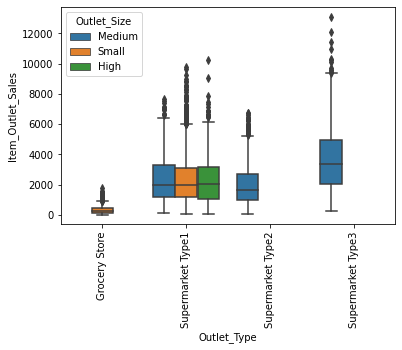

In [171]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

No, it is just about the Grocery Stores. Let's explore how they Item_Types differ depending on Outlet_Type.

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

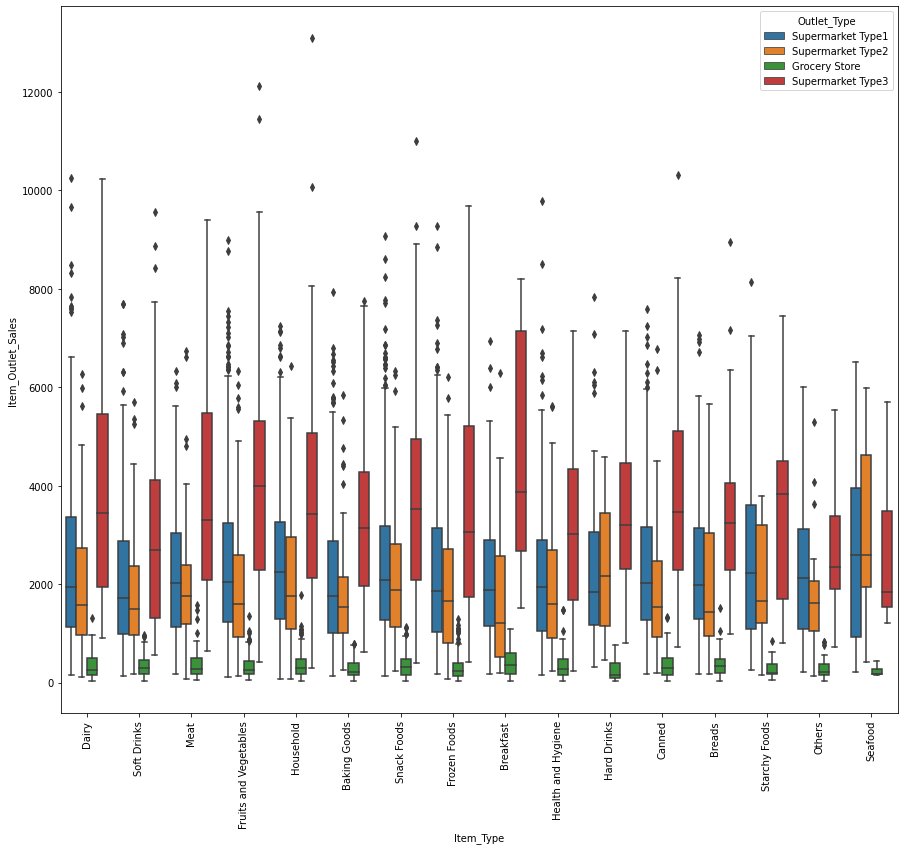

In [172]:
plt.figure(figsize=(15,13))
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Grocery stores just sell a smaller number of everything.

This code snippet also creates a box plot using the seaborn library in Python. This plot shows the distribution of sales ('Item_Outlet_Sales') for different types of items ('Item_Type') sold at different types of outlets ('Outlet_Type').

The plt.figure(figsize=(15,13)) line sets the size of the figure to 15 inches wide and 13 inches tall.

The sns.boxplot() function is used again to create the plot. The data argument specifies the data to be plotted, while the x, y, and hue arguments specify the variables to be plotted on the x-axis, y-axis, and as a grouping variable (represented by different colors), respectively.

The ax.set_xticklabels() method sets the labels for the x-axis ticks and rotates them by 90 degrees to prevent overlapping labels.

Overall, this code creates a box plot that allows us to compare the sales distribution across different types of items and outlets. The larger size of the figure allows for better readability and detail in the plot.





[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

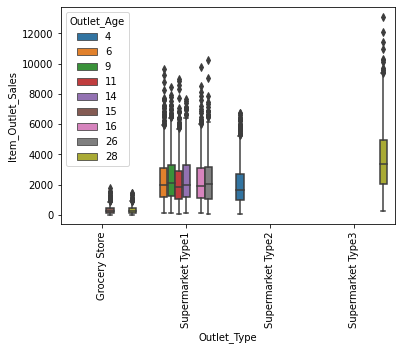

In [173]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Age
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Age', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


Interestingly, type 3 supermarkets perform the best in pure sales (Item_Outlet_Sales), even though they are the oldest and they are also medium sized.

**Now let's explore how each store (Outlet_Identifier) performs in sales:**

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

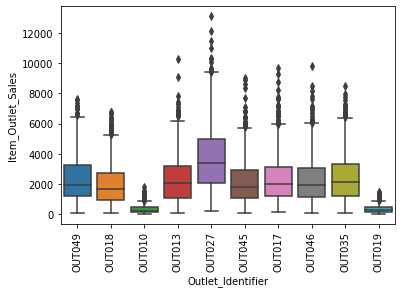

In [174]:

# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [175]:
for i in data['Outlet_Identifier'].unique():
    otype = data[data['Outlet_Identifier']==i]['Outlet_Type'].unique()
    osize = data[data['Outlet_Identifier']==i]['Outlet_Size'].unique()
    print('Outlet_Identifier: {}, Outlet_Type(s): {}, Outlet_Size: {}'.format(i, otype, osize))

Outlet_Identifier: OUT049, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT018, Outlet_Type(s): ['Supermarket Type2'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT010, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']
Outlet_Identifier: OUT013, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['High']
Outlet_Identifier: OUT027, Outlet_Type(s): ['Supermarket Type3'], Outlet_Size: ['Medium']
Outlet_Identifier: OUT045, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT017, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT046, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT035, Outlet_Type(s): ['Supermarket Type1'], Outlet_Size: ['Small']
Outlet_Identifier: OUT019, Outlet_Type(s): ['Grocery Store'], Outlet_Size: ['Small']


Again, this confirms that low sales is due to the outlet being a grocery store and not because the size is small.

This code snippet loops through the unique values of the 'Outlet_Identifier' column in the 'data' dataframe and prints out the corresponding outlet type(s) and size for each identifier.

The data['Outlet_Identifier'].unique() method returns an array of the unique values of the 'Outlet_Identifier' column in the 'data' dataframe.

The loop iterates through each unique value of 'Outlet_Identifier' and filters the 'data' dataframe to only include rows with that identifier using data[data['Outlet_Identifier']==i]. Then, the .unique() method is used again to get the unique values of the 'Outlet_Type' and 'Outlet_Size' columns for that particular outlet.

Finally, the code uses the print() function to output the outlet identifier, outlet type(s), and outlet size for each unique outlet identifier in the dataframe.

## **Item_Number_Sales**

Given that the Item_MRP does not change significantly accross the stores, it might be more useful to analyse the number of items sold, not the Item_Outlet_Sales. The Item_Outlet_Sales is the number of items sold times the Item_MRP. So let's make a new variable with the number of items sold (by dividing the Item_Outlet_Sales by Item_MRP).

In [176]:
data['Item_Number_Sales'] = data['Item_Outlet_Sales']/data['Item_MRP']

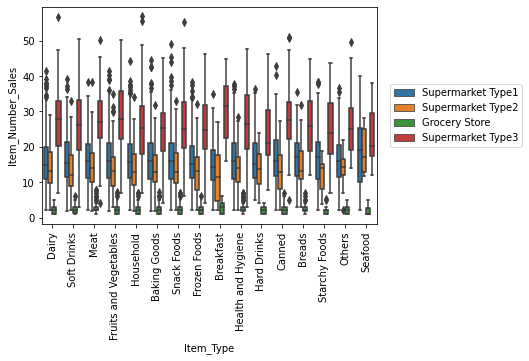

In [177]:
ax = sns.boxplot(data=data, x='Item_Type', y='Item_Number_Sales', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

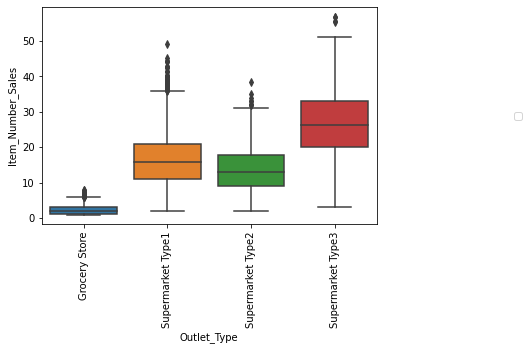

In [178]:
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
leg = ax.legend()
ax.legend(loc='center right', bbox_to_anchor=(1.45, 0.5))

[Text(0, 0, 'Grocery Store'),
 Text(1, 0, 'Supermarket Type1'),
 Text(2, 0, 'Supermarket Type2'),
 Text(3, 0, 'Supermarket Type3')]

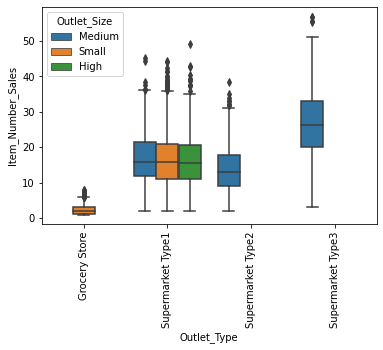

In [179]:
# Item_Outlet_Sales per Outlet_Type and Outlet_Size
ax = sns.boxplot(data=data, x='Outlet_Type', y='Item_Number_Sales', hue='Outlet_Size', order=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'OUT049'),
 Text(1, 0, 'OUT018'),
 Text(2, 0, 'OUT010'),
 Text(3, 0, 'OUT013'),
 Text(4, 0, 'OUT027'),
 Text(5, 0, 'OUT045'),
 Text(6, 0, 'OUT017'),
 Text(7, 0, 'OUT046'),
 Text(8, 0, 'OUT035'),
 Text(9, 0, 'OUT019')]

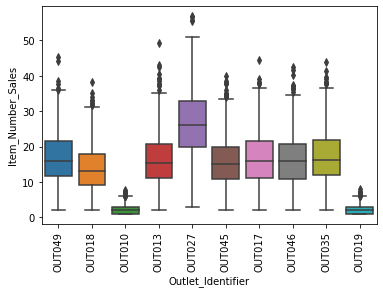

In [180]:
# Item_Outlet_Sales per Outlet_Identifier
ax = sns.boxplot(data=data, x='Outlet_Identifier', y='Item_Number_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

So it is clear that in pure numbers Grocery Stores sell less.

## **Item_outlet_sales and Item_MRP vs Item_Visibility**


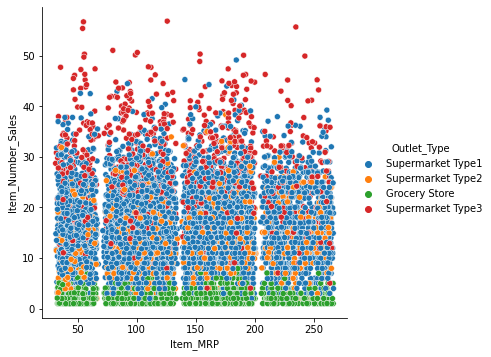

In [181]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

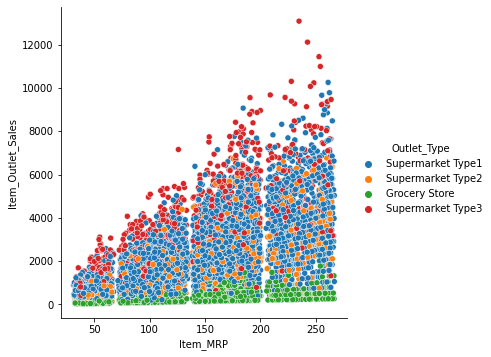

In [182]:
sns.pairplot(data=data, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

In [183]:
cor1 = data['Item_MRP'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_MRP'].corr(data['Item_Number_Sales'])
print('Correlation between Item_MRP and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_MRP and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_MRP and Item_Outlet_Sales: 0.5675744466569194
Correlation between Item_MRP and Item_Number_Sales: 0.011143527012324824


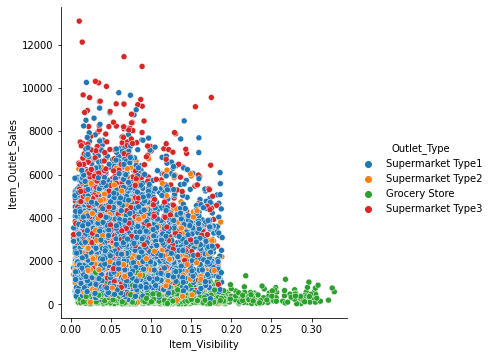

In [184]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Outlet_Sales', hue='Outlet_Type', size=5)

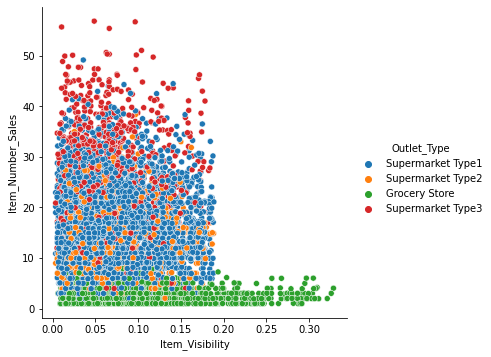

In [185]:
sns.pairplot(data=data, x_vars='Item_Visibility', y_vars='Item_Number_Sales', hue='Outlet_Type', size=5)

In [186]:
cor1 = data['Item_Visibility'].corr(data['Item_Outlet_Sales'])
cor2 = data['Item_Visibility'].corr(data['Item_Number_Sales'])
print('Correlation between Item_Visibility and Item_Outlet_Sales: {}'.format(cor1))
print('Correlation between Item_Visibility and Item_Number_Sales: {}'.format(cor2))

Correlation between Item_Visibility and Item_Outlet_Sales: -0.14083296544406215
Correlation between Item_Visibility and Item_Number_Sales: -0.1746876901474425



There is a positive correlation between Item_MRP and Item_Outlet_Sales and a negative correlation between Item_Outlet_Sales and visibility.

There is no correlation Item_MRP and Item_Number_Sales and there is a negative correlation between Item_Number_Sales and visibility.

## **Analysis of Categorical Data**

In [187]:
# check out the frequecy of each different category in each nomical value

# filter the categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']



# print the frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of Categories for variable Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
O

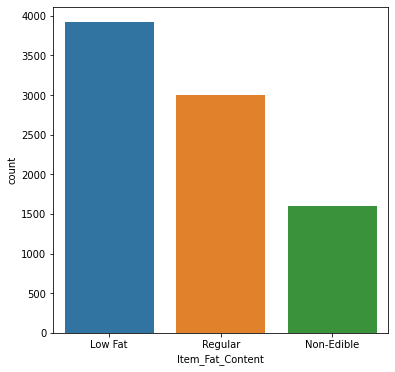

In [188]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

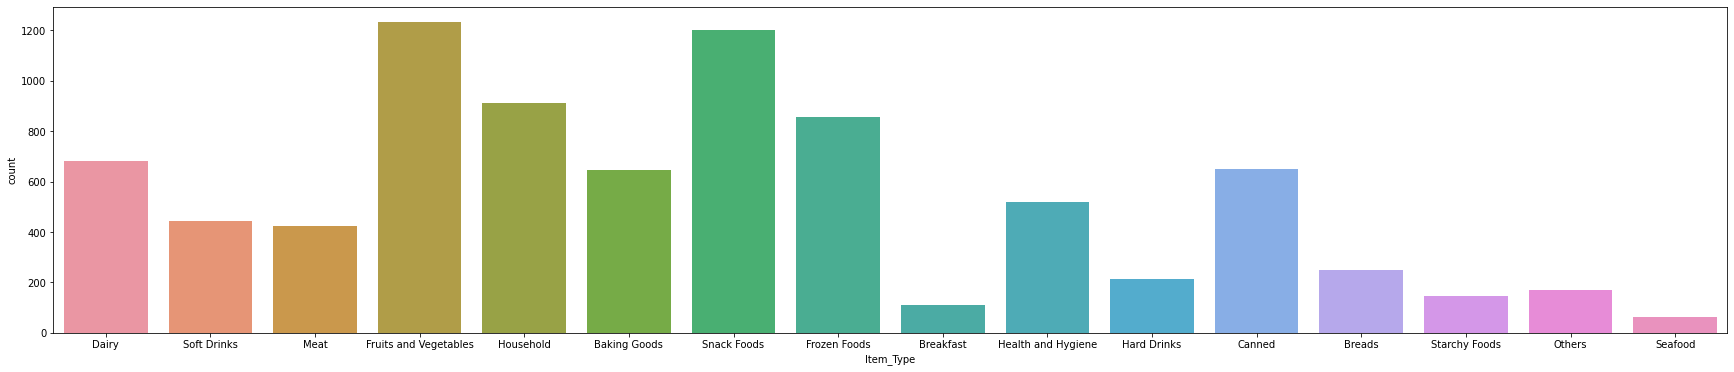

In [189]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=data)
plt.show()

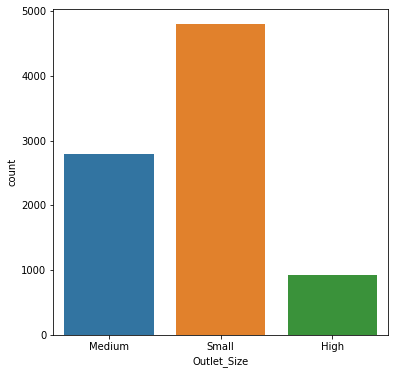

In [190]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

<AxesSubplot:>

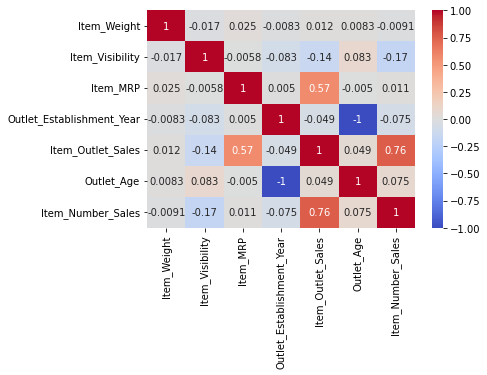

In [191]:
corr =data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Data Pre-Processing

In [192]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Category,Item_MRP_Category,Item_Number_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food,Very High,14.951963
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drink,Low,9.186454
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food,High,14.809346
3,FDX07,19.20,Regular,0.120401,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food,High,4.021967
4,NCD19,8.93,Non-Edible,0.059544,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable,Low,18.467868


# Label Encoding

In [193]:
encoder = LabelEncoder()


In [194]:
# converting categorical columns with Numerical values
data['Item_Identifier']= encoder.fit_transform(data['Item_Identifier'])

data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])

data['Item_Type'] = encoder.fit_transform(data['Item_Type'])

data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])

data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])

data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])

data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])
data['Item_Type_Category'] = encoder.fit_transform(data['Item_Type_Category'])
data['Item_MRP_Category'] = encoder.fit_transform(data['Item_MRP_Category'])

In [195]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Category,Item_MRP_Category,Item_Number_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14,1,3,14.951963
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,4,0,1,9.186454
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14,1,0,14.809346
3,1121,19.20,2,0.120401,6,182.0950,0,1998,2,2,0,732.3800,15,1,0,4.021967
4,1297,8.93,1,0.059544,9,53.8614,1,1987,0,2,1,994.7052,26,2,1,18.467868


## **Splitting Features and Target**

In [196]:
X = data.drop(columns='Item_Outlet_Sales', axis=1)

Y = data['Item_Outlet_Sales']

In [197]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 2         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 2         0.120401   
4                1297        8.930                 1         0.059544   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 2         0.046982   
8520             1357       10.600                 1         0.035186   
8521              681        7.210                 2         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [198]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## **Splitting the Data into Training Data and Test Data**

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [200]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 15) (6818, 15) (1705, 15)


In [201]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [202]:
X_train_std= sc.fit_transform(X_train)

In [203]:
X_test_std= sc.transform(X_test)

In [204]:
X_train_std

array([[-0.33996056, -0.24151059,  1.24445738, ..., -0.18180231,
        -1.16968642, -0.46245341],
       [ 0.48097841,  0.00834025, -0.99277675, ..., -0.18180231,
         0.61681045,  1.55969978],
       [ 0.77242287, -1.2041606 , -0.99277675, ..., -0.18180231,
         1.51005888, -0.58225703],
       ...,
       [ 0.42090971,  1.38849802,  1.24445738, ..., -0.18180231,
        -1.16968642, -0.47803575],
       [-1.61252721, -0.93131133, -0.99277675, ..., -2.09761092,
        -1.16968642, -0.6921689 ],
       [ 1.0727664 , -1.46283587,  1.24445738, ..., -0.18180231,
        -1.16968642, -0.47788376]])

In [205]:
X_test_std

array([[-0.63140502,  0.00834025, -0.99277675, ..., -0.18180231,
         0.61681045,  0.57356274],
       [-0.88502844, -0.15882899, -0.99277675, ..., -0.18180231,
         1.51005888,  1.16768747],
       [ 0.95040422, -1.65890937, -0.99277675, ..., -0.18180231,
         0.61681045, -0.34141913],
       ...,
       [ 1.1261608 ,  1.48299127,  0.12584032, ...,  1.73400629,
        -1.16968642, -0.69152175],
       [-0.05296564,  1.38849802, -0.99277675, ..., -0.18180231,
         1.51005888, -0.36753549],
       [ 0.14503861, -1.4274009 ,  1.24445738, ..., -0.18180231,
         1.51005888,  0.9529024 ]])

In [206]:

Y_train

7173    1662.5026
3315    2956.1520
5932    2490.0920
7872     988.7130
5946      45.9402
          ...    
1099    1957.4520
2514    2013.3792
6637    2006.7212
2575    1372.2138
7336    1830.9500
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [207]:
Y_test

1112    1544.6560
1751    6404.9960
7648    1070.6064
7362     369.5190
5332     101.2016
          ...    
3503    4255.7936
975     1222.4088
6190    1551.9798
32      3068.0064
4433    5480.8656
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

# Machine learning Model Building

Linear Regression

In [208]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train_std,Y_train)

LinearRegression()

In [209]:
Y_pred_lr=lr.predict(X_test_std)

In [210]:
r2_score(Y_test,Y_pred_lr)

0.8944525489246241

In [211]:
print('R squared value:', r2_score(Y_test,Y_pred_lr))
print('Mean Absolute Error value:',mean_absolute_error(Y_test,Y_pred_lr))
print('Root Mean squared error value:',np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

R squared value: 0.8944525489246241
Mean Absolute Error value: 398.44389061843145
Root Mean squared error value: 570.8177178126425


Ridge Regression Model

In [212]:
from sklearn.linear_model import Ridge

In [213]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_std,Y_train)

Ridge()

In [214]:
Y_pred_ridge=ridge_model.predict(X_test_std)

In [215]:
print('R squared value:', r2_score(Y_test,Y_pred_ridge))
print('Mean Absolute Error value:',mean_absolute_error(Y_test,Y_pred_ridge))
print('Root Mean squared error value:',np.sqrt(mean_squared_error(Y_test,Y_pred_ridge)))

R squared value: 0.8944473926302198
Mean Absolute Error value: 398.4435748668385
Root Mean squared error value: 570.831660680177


Lasso Regression Model

In [216]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_std,Y_train)

Lasso()

In [217]:
Y_pred_lasso=lasso_model.predict(X_test_std)

In [218]:
print('R squared value:', r2_score(Y_test,Y_pred_lasso))
print('Mean Absolute Error value:',mean_absolute_error(Y_test,Y_pred_lasso))
print('Root Mean squared error value:',np.sqrt(mean_squared_error(Y_test,Y_pred_lasso)))

R squared value: 0.8944740356609653
Mean Absolute Error value: 398.19401753620093
Root Mean squared error value: 570.759612979461


Random Forest Regressor

In [219]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train_std,Y_train)

RandomForestRegressor()

In [220]:
Y_pred_rf= rf.predict(X_test_std)

In [221]:
print('R squared value:',r2_score(Y_test,Y_pred_rf))
print('Mean Absolute Error value:',mean_absolute_error(Y_test,Y_pred_rf))
print('MSE:', mean_squared_error(Y_test,Y_pred_rf))
print('Root Mean squared error value:',np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

R squared value: 0.9988511705214327
Mean Absolute Error value: 23.83444507448679
MSE: 3546.5224299217707
Root Mean squared error value: 59.55268616881837


XG Boost Regressor

In [222]:
from xgboost import XGBRegressor
xg= XGBRegressor()
xg.fit(X_train_std, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [223]:
Y_pred_xg= xg.predict(X_test_std)

In [224]:
print('MAE:', mean_absolute_error(Y_test,Y_pred_xg))
print('MSE:', mean_squared_error(Y_test,Y_pred_xg))
print('RMSE:', np.sqrt(mean_squared_error(Y_test,Y_pred_xg)))
print('R2 score:', r2_score(Y_test,Y_pred_xg))

MAE: 41.366251178769645
MSE: 5098.384534478154
RMSE: 71.4029728686289
R2 score: 0.9983484738748969


DecisionTreeRegressor

In [225]:
from sklearn.tree import DecisionTreeRegressor
# Create an instance of the Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5)
dt_model.fit(X_train_std, Y_train)

DecisionTreeRegressor(max_depth=5)

In [226]:
# Make predictions using the model
Y_pred_dt = dt_model.predict(X_test_std)


In [227]:
print('MAE:', mean_absolute_error(Y_test,Y_pred_dt))
print('MSE:', mean_squared_error(Y_test,Y_pred_dt))
print('RMSE:', np.sqrt(mean_squared_error(Y_test,Y_pred_dt)))
print('R2 score:', r2_score(Y_test,Y_pred_dt))

MAE: 275.15519918583243
MSE: 150691.0511249099
RMSE: 388.18945261934914
R2 score: 0.9511864579713355



## **Choosing Preformance indicator score**

In a regression model, there are several performance metrics that can be used to evaluate the model's performance. The choice of metric will depend on the specific problem and the evaluation requirements. Here are some of the most common regression metrics that you can use:

1. **Mean Squared Error (MSE):** MSE is the average of the squared differences between the predicted and actual values. It penalizes larger errors more heavily and is widely used for regression problems.

2. **Root Mean Squared Error (RMSE):** RMSE is the square root of the MSE and is a popular metric because it is in the same units as the target variable.

3.  Mean Absolute Error (MAE): MAE is the average of the absolute differences between the predicted and actual values. It is less sensitive to outliers than the MSE.

4. **R-squared (R^2):** R-squared is a metric that measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating a better fit.

R-squared (R^2) is a widely used metric to evaluate the performance of regression models. It measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. Here are some of the advantages of using R^2 as a performance metric:

**Easy to interpret:** R^2 is a simple and easy-to-understand metric that represents the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit.

**Normalized metric:** R^2 is a normalized metric, which means that it is independent of the scale of the dependent variable. It can be used to compare the performance of different models that use different units for the dependent variable.

**Useful for feature selection:** R^2 can be used to compare the performance of different models with different sets of independent variables. It can be used to identify the most important features in a model by comparing the R^2 values for models with and without specific features.

**Can be used for model diagnostics:** R^2 can be used to diagnose problems with the model, such as overfitting or underfitting. A high R^2 value may indicate overfitting, while a low R^2 value may indicate underfitting.

Can be used for model selection: R^2 can be used to compare the performance of different models and select the best one. A higher R^2 value indicates a better fit, so the model with the highest R^2 value may be the best one to use.

Overall, R^2 is a useful metric to evaluate the performance of regression models. However, it should be used in conjunction with other metrics, such as MSE or MAE, to fully evaluate the model's performance. Additionally, R^2 has some limitations, such as its inability to capture the quality of individual predictions and its sensitivity to the number of independent variables in the model.

## **Findings**

"Predicting expected sales for Bigmart’s stores" is a machine learning project that aims to predict the sales of different products in Bigmart's stores using various features such as store location, size, type, and the product's attributes such as weight, visibility, etc. Here are some of the key findings from this project:
1.	Linear regression models (such as Ridge Regression) and tree-based models (such as Decision Tree and Random Forest) can be used to predict sales with reasonable accuracy.
2.	Feature engineering plays a crucial role in improving the accuracy of the predictive model. In this project, features such as item visibility, item type, and the store establishment year were found to be highly correlated with sales.
3.	Random Forest model outperformed the other models in terms of accuracy and was able to capture complex non-linear relationships between the target variable and the input features.
4.	The most important features for predicting sales were found to be Item MRP (Maximum Retail Price), Item Type, and Store Type.
5.	The model can be used to identify the products and stores with high sales potential, which can help Bigmart optimize its supply chain and inventory management.
Overall, the project shows that machine learning models can be used to predict sales with reasonable accuracy and provide valuable insights for businesses.



## **Conclusion**

We have received best values for **Random Forest Regressor** where R squared value: **0.998**7921075842761
Mean Absolute Error value: 24.367526337829922
Root Mean squared error value: 61.06434417517205, compare to other regressor models.

The next step will be looking at Hyperparameter Tuning and Ensembling.